# Stochastische Prozesse

## Vertiefung

### Übersicht

1. Monte-Carlo-Simulation
2. Simulated Annealing

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


### 1. Monte-Carlo-Simulation

Monte-Carlo-Simulation ist eine grosse Klasse von Methoden, die Fragestellungen mithilfe einer grossen Anzahl Zufallsexperimenten beantworten.

Beispiele:

- Bestimmen von statistische Eigenschaften von Zufallsprozessen, z.B. [Markow-Chain-Monte-Carlo-Verfahren (MCMC)](https://de.wikipedia.org/wiki/MCMC-Verfahren).
- Stochastisches Sampling der Zielfunktion eines Optimierungsproblems, siehe Simulated Annealing unten.
- Resampling von Daten, um statistische Eigenschaften zu bestimmen, z.B. [Bootstrapping](https://de.wikipedia.org/wiki/Bootstrapping-Verfahren).

#### Beispiel aus Einarbeitung: Diffusionsprozess

- Stationäre Verteilung
- Genauigkeit der Schätzung der stationären Verteilung

In [6]:
A, B = 0, 1
p_AB = 0.1
p_BA = 0.2


def markov_next(x, rng):
    if x == A:
        return rng.choice((A, B), p=(1 - p_AB, p_AB))
    else:
        return rng.choice((A, B), p=(p_BA, 1 - p_BA))


def markov_process(x, rng, n):
    xs = [x]
    for _ in range(n):
        x = markov_next(x, rng)
        xs.append(x)
    return np.array(xs)


In [43]:
n_steps = 1000
n_particles = 250
rng = np.random.default_rng(987234)
end_states = [markov_process(A, rng, 250)[-1]for _ in range(n_particles //2 )]
#end_states += [markov_process(A, rng, 250)[-1]for _ in range(n_particles //2 )]

<BarContainer object of 2 artists>

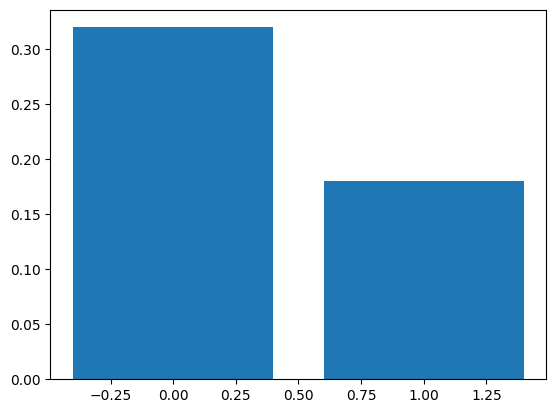

In [45]:
counts = Counter(end_states)
frequenties  = np.array(list(counts.values())) / n_particles

plt.bar(counts.keys(),frequenties)

In [46]:
all_states = np.array([markov_process(A, rng, 250)for _ in range(n_particles)])


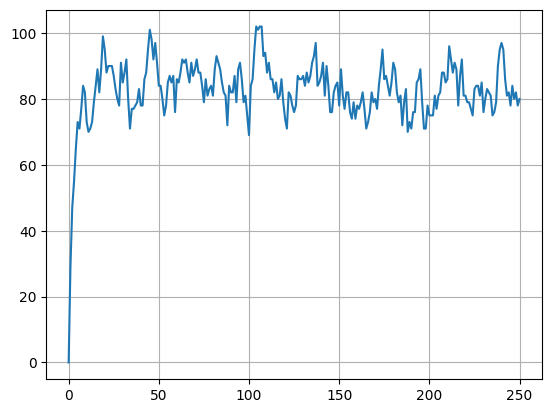

In [47]:
plt.plot(np.sum(all_states, axis=0))
plt.grid()

#### Beispiel mit 3 Zuständen

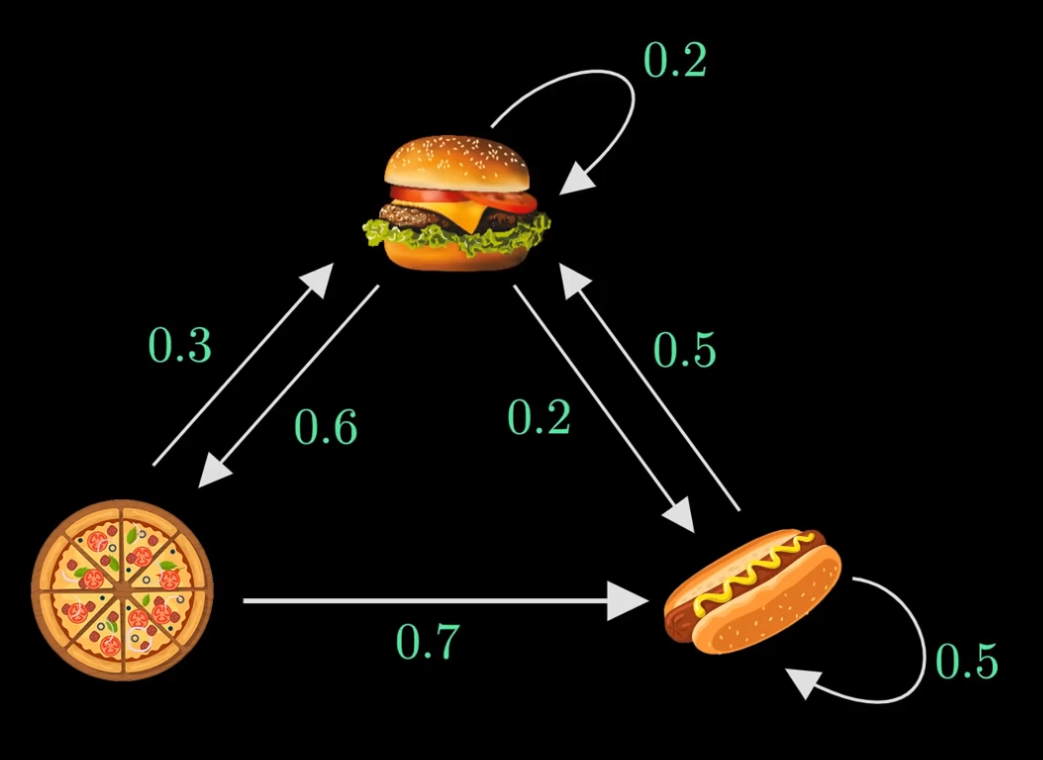

- ["Markov Chains Clearly Explained! Part - 1" - Normalized Nerd](https://www.youtube.com/watch?v=i3AkTO9HLXo&list=PLM8wYQRetTxBkdvBtz-gw8b9lcVkdXQKV)

In [ ]:
HAMBURGER, PIZZA, HOTDOG = 0, 1, 2
states = np.array((HAMBURGER, PIZZA, HOTDOG))
transition_matrix = np.array(
    (
        (0.2, 0.6, 0.2),
        (0.3, 0.0, 0.7),
        (0.5, 0.5, 0.0),
    )
)


### 3. Simulated Annealing

[Simulated Annealing](https://de.wikipedia.org/wiki/Simulated_Annealing) ist ein stochastisches Optimierungsverfahren, das auf verschiedenste Probleme angewendet werden kann. Stochastisch bedeutet hier, dass bei der Suche des Optimums Zufallszahlen verwendet werden, um den Lösungsraum $D$ zu durchsuchen. Als eine Konsequenz kann man nicht sicher sein, ob man je das globale Optimum wirklich findet. Solche Verfahren werden dann genutzt, wenn exakte Methoden nicht anwendbar sind, weil der Lösungsraum zu gross ist oder die Zielfunktion zu komplex oder nicht differenzierbar ist.

Das gesuchte Optimum kann ein globales Minimum oder Maximum einer (skalaren) Zielfunktion $f$ sein. Hier formulieren wir es als ein Minimierungsproblem, ansonsten könnten wir einfach das Minimum von $-f(x)$ suchen.

$$
\text{Suche}\qquad
x_\text{opt} = \argmin_{x \in D} f(x)
\qquad \text{für} \qquad
f: D \rightarrow \mathbb{R}
$$

Der Lösungsraum $D$ kann eine Teilmenge des Vektorraums $\mathbb{R}^n$ sein, aber auch eine Menge von diskreten Werten. Die Funktion $f$ muss nicht stetig oder differenzierbar sein. Falls ein Maximum einer Funktion $g(x)$ gesucht würde, können wir einfach $f(x) = -g(x)$ minimieren.

Vorgehen:
1. Startpunkt $x_i \in D$ für $i=0$ wählen, evtl. zufällig.
2. Neuen Punkt $x_\ast$ zufällig aus der Umgebung von $x_i$ ziehen.
3. Falls $f(x_\ast) < f(x_i)$, dann $x_\ast$ als neuen Punkt wählen, also $x_{i+1}=x_\ast$. Sonst mit Wahrscheinlichkeit $p$ als neuen Punkt wählen, oder verwerfen.
4. Falls Abbruchkriterium erfüllt, dann $x_i$ als Lösung zurückgeben, sonst mit $i=i+1$ zu 2.

Die Akzeptanzwahrscheinlichkeit $p$ wird häufig als Boltzmann-Verteilung gewählt:

$$ p = \exp\left(-\frac{f(x_\ast)-f(x_i)}{T}\right) $$

- Je schlechter der Lösungsvorschlag $x_\ast$, d.h. je grösser die Differenz $f(x_\ast)-f(x_i)$, desto kleiner die Akzeptanzwahrscheinlichkeit
- Je höher die Temperatur $T$, desto grösser die Akzeptanzwahrscheinlichkeit
- Die Temperatur wird mit der Zeit (Anzahl Iterationen) abgesenkt, um die Akzeptanzwahrscheinlichkeit zu verringern.

Die Qualität und Effizienz des Verfahrens hängt stark von der Wahl der Umgebung des Lösungsvorschlags $x_i$ ab. Die Umgebung sollte so gewählt werden, dass die Wahrscheinlichkeit, einen besseren Punkt zu finden, nicht zu klein ist, und gleichzeitig die Möglichkeit besteht, den gesamten Lösungsraum zu durchsuchen und so lokalen Extremstellen zu entkommen.

Videos:

- ["Simulated Annealing" - Andreas Müller](https://www.youtube.com/watch?v=iaq_Fpr4KZc)

#### Beispiel 1: Minimierung einer Funktion in 1D

In [ ]:
def cost(x):
    return x**4 - x**2 - 0.1 * x + 2


x = np.linspace(-1.2, 1.2, 100)
y = cost(x)

x_extrema = np.array((-0.680639, -0.0502538, 0.730893))
y_extrema = cost(x_extrema)
x_optimum = x_extrema[np.argmin(y_extrema)]
y_optimum = cost(x_optimum)

plt.plot(x, y)
plt.plot(x_extrema, y_extrema, "go", label="local extrema")
plt.plot(x_optimum, y_optimum, "ro", label="global optimum")
plt.xlabel("x")
plt.ylabel("y = cost(x)")
plt.grid()
plt.legend()
plt.show()


#### Schritt 1: Random Walk im Lösungsraum

In [ ]:
rng = np.random.default_rng(982374)

i = 0


#### Schritt 2: Nur bessere Punkte akzeptieren

#### Schritt 3: Akzeptanzwahrscheinlichkeit

#### Beispiel Regression: Problemstellung

Wir haben Datenpunkte $(x_i,y_i)$ gemessen und möchten eine lineare Regression mit der Methode der kleinsten Quadrate durchführen, siehe Vertiefung Woche 2. Es gilt die [Residuenquadratsumme](https://de.wikipedia.org/wiki/Residuenquadratsumme) zu minimieren:

$$ SQR(m,b) = \sum_{i}^n \left(y_i - mx_i - b \right)^2 $$

Wir simulieren zuerst die Daten

In [ ]:
m_true = 1.5
b_true = -2
sigma = 0.5

rng = np.random.default_rng(42)
n = 25
x = np.sort(rng.uniform(-2, 4, size=n))
y_true = m_true * x + b_true
y = y_true + rng.normal(scale=sigma, size=n)

plt.plot(x, y_true, "r", label="true")
plt.plot(x, y, "bo", label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


und definieren die Zielfunktion:

In [ ]:
def SQR(m, b):
    return np.sum((y - (m * x + b)) ** 2)
